# APRs y Embeddings: Analisis de importancias
---

# Drive, librerias, etc

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import umap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold
import h5py
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,  roc_curve, auc, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Importamos el Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ruta inicial de las amyloid proteins

In [ ]:
ruta_apr_amyprot = '/content/drive/MyDrive/aggregation_itba/data/En uso/amypro_selected.tsv'

In [ ]:
ruta_desorden_amyprot = '/content/drive/MyDrive/aggregation_itba/data/En uso/amypro_positive_embeddings.tsv'

In [ ]:
alvaro_path = '/content/drive/MyDrive/aggregation_itba/data/En uso/alvaro_proteins.pickle'

# Cargar datos desde el archivo pickle
with open(alvaro_path, 'rb') as f:
    embeddings_alvaro_data = pickle.load(f)


# Convertir a DataFrame de pandas
df_desorden = pd.DataFrame(embeddings_alvaro_data)

In [ ]:
# Lee el archivo TSV en un DataFrame de pandas
#df_desorden = pd.read_csv(ruta_desorden_amyprot, sep='\t')
df_apr = pd.read_csv(ruta_apr_amyprot, sep='\t')

In [ ]:
df_apr.keys()

Index(['id_in_source', 'uniprot_id', 'category', 'start', 'end', 'length',
       'source'],
      dtype='object')

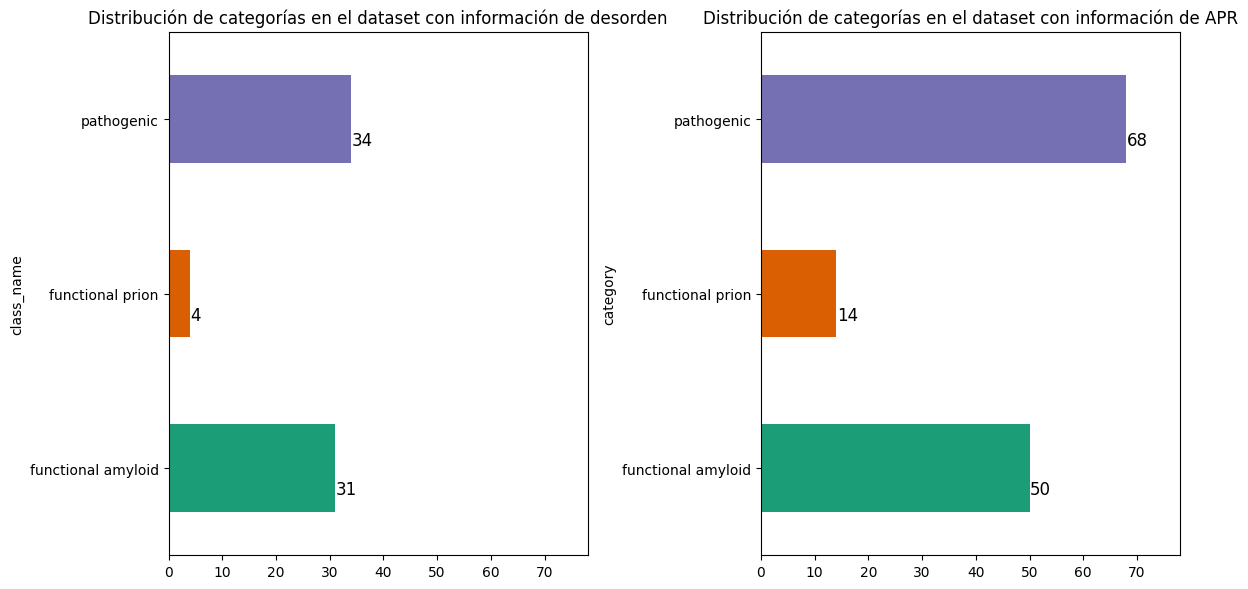

In [ ]:
# Obtener los valores máximos de ambos conjuntos de datos
max_value = max(df_desorden.groupby('class_name').size().max(), df_apr.groupby('category').size().max()) + 10

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para el dataset con información de desorden
ax = df_desorden.groupby('class_name').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[0])
ax.set_title("Distribución de categorías en el dataset con información de desorden")
ax.spines[['top', 'right']].set_visible(True)
ax.set_xlim([0, max_value])  # Fijar el límite en el eje y

# Añadir etiquetas dentro de cada barra
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.1, str(round(i.get_width())), fontsize=12, color='black')

# Gráfico para el dataset con información de APR
ax = df_apr.groupby('category').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[1])
ax.set_title("Distribución de categorías en el dataset con información de APR")
ax.spines[['top', 'right']].set_visible(True)
ax.set_xlim([0, max_value])  # Fijar el límite en el eje y

# Añadir etiquetas dentro de cada barra
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.1, str(round(i.get_width())), fontsize=12, color='black')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Establecer el ancho máximo de columna
pd.set_option('display.max_colwidth', 15)  # Puedes ajustar el valor según tu preferencia

df_desorden

,entry_id,uniprot_id,class_name,region_sequence,uniprot_start,uniprot_end,full_seq,region_embedding,full_seq_embedding
0,AP00001,P01236,pathogenic,LPICPGGAARC...,29,227,MNIKGSPWKGS...,[[-0.062324...,[[0.0736898...
1,AP00002,P01258,pathogenic,CGNLSTCMLGT...,85,116,MGFQKFSPFLA...,[[0.0792614...,[[0.1142445...
2,AP00003,P02647,pathogenic,DEPPQSPWDRV...,25,267,MKAAVLTLAVL...,[[0.1127525...,[[0.1154272...
3,AP00004,P02663,pathogenic,KNTMEHVSSSE...,16,222,MKFFIFTCLLA...,[[-0.090187...,[[0.0200585...
4,AP00005,P0DJI8,pathogenic,RSFFSFLGEAF...,19,122,MKLLTGLVFCS...,[[-0.153230...,[[-0.104943...
...,...,...,...,...,...,...,...,...,...
64,AP00116,P52750,functional ...,LPASAAKNAKL...,19,135,MRFIVSLLAFT...,[[-0.136994...,[[-0.217071...
65,AP00117,P32588,functional ...,SENNEEQHQQQ...,2,453,MSENNEEQHQQ...,[[0.0876804...,[[0.2642935...
66,AP00119,C4IN70,functional ...,GPAEKWKPTPA...,25,250,MKPTMALKPLV...,[[-0.006437...,[[0.2515512...
67,AP00120,C4IN69,functional ...,DSNNQALIDNA...,19,182,MTHSWLLLTVL...,[[-0.097117...,[[0.0920332...


In [ ]:
# Eliminar el carácter "#" de la columna id_in_source en df_apr
df_apr['id_in_source'] = df_apr['id_in_source'].str.replace('#', '')
df_apr.rename(columns={'id_in_source': 'entry_id'}, inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', 20)

df_apr

,entry_id,uniprot_id,category,start,end,length,source
0,AP00054,Q08972,functional prion,1,153,153,amypro
1,AP00057,P52912,functional prion,290,386,97,amypro
2,AP00056,P40070,functional prion,91,187,97,amypro
3,AP00051,Q9PWC8,functional amyloid,95,100,6,amypro
4,AP00051,Q9PWC8,functional amyloid,189,195,7,amypro
...,...,...,...,...,...,...,...
127,AP00064,Q969E3,functional amyloid,1,38,38,amypro
128,AP00065,P01275,functional amyloid,1,37,37,amypro
129,AP00109,P86706,functional amyloid,1,11,11,amypro
130,AP00124,Q01524,functional amyloid,1,32,32,amypro


In [ ]:
# Obtener la intersección de los conjuntos de uniprot_id
uniprot_id_intersection = set(df_apr['uniprot_id']).intersection(set(df_desorden['uniprot_id']))

# Mostrar los elementos coincidentes
print("Elementos de uniprot_id que coinciden entre ambas tablas:")
print(uniprot_id_intersection, "\n", "Cantidad de uniprot_id que coinciden:", len(uniprot_id_intersection))

Elementos de uniprot_id que coinciden entre ambas tablas:
{'Q15582', 'P01308', 'P00441', 'P61626', 'P06396', 'P22303', 'Q03689', 'P0ABK7', 'Q08431', 'P04004', 'P40967', 'P09681', 'P10636', 'P11686', 'P61825', 'P00698', 'P02663', 'Q53643', 'Q04571', 'P60852', 'P11657', 'P02788', 'P02647', 'P04156', 'Q9AD92', 'P16860', 'P61769', 'Q969E3', 'P01258', 'P02655', 'P10997', 'Q9UBU3', 'Q99972', 'P05067', 'P04002', 'Q9PWC8', 'A1E959', 'Q9Z4N4', 'P0DJI8', 'P02766', 'Q01524', 'Q4ZHU1', 'P23202', 'Q1EN15', 'P01236', 'P28307', 'P01275', 'P06850', 'P55090', 'P01012', 'P05453', 'P15309', 'J7GMN2', 'Q59L12', 'P01160', 'P04279', 'P01034', 'P02671'} 
 Cantidad de uniprot_id que coinciden: 58


Obtenemos el dataframe del archivo pickle con los per-residue y per-protein embeddings.

In [ ]:
# Unir las tablas en función de uniprot_id para los elementos coincidentes
merged_df = pd.merge(df_apr, df_desorden, on='uniprot_id', how='inner')
# Seleccionar y renombrar las columnas relevantes
merged_df = merged_df[['entry_id_x', 'uniprot_id', 'class_name', 'uniprot_start', 'uniprot_end', 'start', 'end', 'region_sequence','region_embedding','full_seq', 'full_seq_embedding']]
merged_df.rename(columns={'entry_id_x':'entry_id', 'class_name': 'category', 'start': 'start_apr', 'end': 'end_apr', 'uniprot_start': 'start_orden', 'uniprot_end': 'end_orden'}, inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', 20)
# Mostrar el DataFrame resultante
merged_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
4,AP00042,Q04571,functional amyloid,27,108,70,76,ATTIGPNTCSIDDYKP...,"[[-0.2289908, -0...",MQFTSVFTILAIAMTA...,"[[-0.009406352, ..."
...,...,...,...,...,...,...,...,...,...,...,...
99,AP00061,Q53643,functional amyloid,1,24,1,24,MNTLFNLFFDFITGIL...,"[[0.10280526, -0...",MNTLFNLFFDFITGIL...,"[[0.039081033, -..."
100,AP00062,P06850,functional amyloid,154,194,1,41,SEEPPISLDLTFHLLR...,"[[0.17105918, -0...",MRLPLLVSAGVLLVAL...,"[[0.048102625, -..."
101,AP00063,P55090,functional amyloid,81,120,1,40,DDPPLSIDLTFHLLRT...,"[[0.11740042, -0...",MRQRGRATLLVALLLL...,"[[-0.025486413, ..."
102,AP00064,Q969E3,functional amyloid,120,157,1,38,FTLSLDVPTNIMNLLF...,"[[-0.019602804, ...",MLMPVHFLLLLLLLLG...,"[[0.10710952, -0..."


In [ ]:
# Buscar los registros donde full_seq y full_seq_embedding son NaN
nan_records = merged_df[(merged_df['full_seq'].isna()) & (merged_df['full_seq_embedding'].isna())]

In [ ]:
nan_records

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN


Lo dejamos por ahora

In [ ]:
# Sobrescribir full_seq y full_seq_embedding con region_sequence y region_embedding respectivamente donde sean NaN
# merged_df['full_seq'] = merged_df['full_seq'].fillna(merged_df['region_sequence'])
# merged_df['full_seq_embedding'] = merged_df['full_seq_embedding'].combine_first(merged_df['region_embedding'])

# Mostrar el DataFrame actualizado
# merged_df

In [ ]:
# Guardar el DataFrame como un archivo TSV
#merged_df.to_csv('/content/drive/MyDrive/aggregation_itba/data/En uso/merged_data.tsv', sep='\t', index=False)

# Analisis y pre-procesamiento de los embeddings

Obtenemos solo la columna de los embeddings de la secuencia completa, buscamos la proteina con mas aminoacidos en su secuencia, sacamos la longitud maxima y en base a eso paddeamos con zeros el resto de embeddings de las otras proteinas (con menos longitud). No parece ser la mejor opcion

**NUEVA**: obtener cada embedding de cada aminoacido y su etiqueta. Probar algoritmos de machine.

## Generar el vector de APR

In [ ]:
merged_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
4,AP00042,Q04571,functional amyloid,27,108,70,76,ATTIGPNTCSIDDYKP...,"[[-0.2289908, -0...",MQFTSVFTILAIAMTA...,"[[-0.009406352, ..."
...,...,...,...,...,...,...,...,...,...,...,...
99,AP00061,Q53643,functional amyloid,1,24,1,24,MNTLFNLFFDFITGIL...,"[[0.10280526, -0...",MNTLFNLFFDFITGIL...,"[[0.039081033, -..."
100,AP00062,P06850,functional amyloid,154,194,1,41,SEEPPISLDLTFHLLR...,"[[0.17105918, -0...",MRLPLLVSAGVLLVAL...,"[[0.048102625, -..."
101,AP00063,P55090,functional amyloid,81,120,1,40,DDPPLSIDLTFHLLRT...,"[[0.11740042, -0...",MRQRGRATLLVALLLL...,"[[-0.025486413, ..."
102,AP00064,Q969E3,functional amyloid,120,157,1,38,FTLSLDVPTNIMNLLF...,"[[-0.019602804, ...",MLMPVHFLLLLLLLLG...,"[[0.10710952, -0..."


In [ ]:
uniprot_ids = merged_df['uniprot_id'].unique()
uniprot_ids

array(['Q9PWC8', 'P60852', 'Q04571', 'Q9Z4N4', 'P01275', 'P04002',
       'P02671', 'P0ABK7', 'P28307', 'Q03689', 'P23202', 'P05453',
       'Q9AD92', 'P40967', 'P01308', 'P02655', 'A1E959', 'P01034',
       'Q15582', 'Q9UBU3', 'J7GMN2', 'P00698', 'P15309', 'Q99972',
       'Q1EN15', 'P01012', 'P06396', 'P05067', 'P10997', 'P10636',
       'P11686', 'P61769', 'P61626', 'P16860', 'Q08431', 'P09681',
       'P04156', 'P04279', 'P02766', 'P02788', 'P02663', 'P0DJI8',
       'P01258', 'P02647', 'P01236', 'P11657', 'Q59L12', 'P00441',
       'P04004', 'P01160', 'P61825', 'Q4ZHU1', 'P22303', 'Q53643',
       'P06850', 'P55090', 'Q969E3', 'Q01524'], dtype=object)

In [ ]:
len(uniprot_ids)

58

In [ ]:
sub_df = merged_df[merged_df['uniprot_id'] == "Q9PWC8"]

sub_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN


In [ ]:
# Crear un diccionario vacío para almacenar los resultados
APR_dic = {}

# Iterar sobre los valores únicos de uniprot_id
for uniprot_id in merged_df['uniprot_id'].unique():
  if uniprot_id != 'Q9PWC8':
      # Filtrar el DataFrame para obtener solo las filas correspondientes a uniprot_id actual
      subconjunto_df = merged_df[merged_df['uniprot_id'] == uniprot_id]

      # Inicializar un vector de ceros con la longitud de la secuencia completa
      full_seq_len = len(subconjunto_df.iloc[0]['full_seq'])
      vector = np.zeros(full_seq_len)

      # Iterar sobre las filas del subconjunto DataFrame para llenar con unos las regiones APR
      for _, fila in subconjunto_df.iterrows():
          start_apr = fila['start_apr']
          end_apr = fila['end_apr']
          vector[start_apr - 1:end_apr] = 1  # Indices basados en cero

      # Almacenar el vector en el diccionario usando uniprot_id como clave
      APR_dic[uniprot_id] = vector

# Mostrar el resultado
# APR_dic

In [ ]:
# Inicializar la variable para almacenar el total de aminoácidos
total_aminoacidos = 0

# Iterar sobre los valores únicos de uniprot_id
for uniprot_id in merged_df['uniprot_id'].unique():
  if uniprot_id != "Q9PWC8":
    # Filtrar el DataFrame para obtener solo las filas correspondientes a uniprot_id actual
    subconjunto_df = merged_df[merged_df['uniprot_id'] == uniprot_id]

    # Obtener la longitud de la secuencia completa y sumarla al total de aminoácidos
    total_aminoacidos += len(subconjunto_df.iloc[0]['full_seq'])

# Mostrar el total de aminoácidos
print("Total de aminoácidos en todas las secuencias de proteínas:", total_aminoacidos)

Total de aminoácidos en todas las secuencias de proteínas: 22068


In [ ]:
APR_labels = np.concatenate(list(APR_dic.values()))

In [ ]:
len(APR_labels)

22068

In [ ]:
merged_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
4,AP00042,Q04571,functional amyloid,27,108,70,76,ATTIGPNTCSIDDYKP...,"[[-0.2289908, -0...",MQFTSVFTILAIAMTA...,"[[-0.009406352, ..."
...,...,...,...,...,...,...,...,...,...,...,...
99,AP00061,Q53643,functional amyloid,1,24,1,24,MNTLFNLFFDFITGIL...,"[[0.10280526, -0...",MNTLFNLFFDFITGIL...,"[[0.039081033, -..."
100,AP00062,P06850,functional amyloid,154,194,1,41,SEEPPISLDLTFHLLR...,"[[0.17105918, -0...",MRLPLLVSAGVLLVAL...,"[[0.048102625, -..."
101,AP00063,P55090,functional amyloid,81,120,1,40,DDPPLSIDLTFHLLRT...,"[[0.11740042, -0...",MRQRGRATLLVALLLL...,"[[-0.025486413, ..."
102,AP00064,Q969E3,functional amyloid,120,157,1,38,FTLSLDVPTNIMNLLF...,"[[-0.019602804, ...",MLMPVHFLLLLLLLLG...,"[[0.10710952, -0..."


### Chequeo

In [ ]:
subconjunto_df = merged_df[merged_df['uniprot_id'] == "P60852"]
subconjunto_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."


In [ ]:
len(subconjunto_df.iloc[0]["full_seq"])

638

In [ ]:
len(APR_dic["P60852"])

638

In [ ]:
APR_dic["P60852"][343]

0.0

## Generar vector de orden y desorden

In [ ]:
# Crear un diccionario vacío para almacenar los resultados
Orden_dic = {}

# Iterar sobre los valores únicos de uniprot_id
for uniprot_id in merged_df['uniprot_id'].unique():
  if uniprot_id != 'Q9PWC8':
      # Filtrar el DataFrame para obtener solo las filas correspondientes a uniprot_id actual
      subconjunto_df = merged_df[merged_df['uniprot_id'] == uniprot_id]

      # Inicializar un vector de ceros con la longitud de la secuencia completa
      full_seq_len = len(subconjunto_df.iloc[0]['full_seq'])
      vector = np.zeros(full_seq_len)

      # Iterar sobre las filas del subconjunto DataFrame para llenar con unos las regiones ordenadas
      for _, fila in subconjunto_df.iterrows():
          start_orden = fila['start_orden']
          end_orden = fila['end_orden']
          vector[start_orden - 1:end_orden] = 1  # Indices basados en cero

      # Almacenar el vector en el diccionario usando uniprot_id como clave
      Orden_dic[uniprot_id] = vector

# Mostrar el resultado
# Orden_dic

In [ ]:
Orden_labels = np.concatenate(list(Orden_dic.values()))

In [ ]:
len(Orden_labels)

22068

In [ ]:
merged_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
4,AP00042,Q04571,functional amyloid,27,108,70,76,ATTIGPNTCSIDDYKP...,"[[-0.2289908, -0...",MQFTSVFTILAIAMTA...,"[[-0.009406352, ..."
...,...,...,...,...,...,...,...,...,...,...,...
99,AP00061,Q53643,functional amyloid,1,24,1,24,MNTLFNLFFDFITGIL...,"[[0.10280526, -0...",MNTLFNLFFDFITGIL...,"[[0.039081033, -..."
100,AP00062,P06850,functional amyloid,154,194,1,41,SEEPPISLDLTFHLLR...,"[[0.17105918, -0...",MRLPLLVSAGVLLVAL...,"[[0.048102625, -..."
101,AP00063,P55090,functional amyloid,81,120,1,40,DDPPLSIDLTFHLLRT...,"[[0.11740042, -0...",MRQRGRATLLVALLLL...,"[[-0.025486413, ..."
102,AP00064,Q969E3,functional amyloid,120,157,1,38,FTLSLDVPTNIMNLLF...,"[[-0.019602804, ...",MLMPVHFLLLLLLLLG...,"[[0.10710952, -0..."


### Chequeo

In [ ]:
subconjunto_df = merged_df[merged_df['uniprot_id'] == "P60852"]
subconjunto_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."


In [ ]:
len(subconjunto_df.iloc[0]["full_seq"])

638

In [ ]:
len(Orden_dic["P60852"])

638

In [ ]:
Orden_dic["P60852"][552]

1.0

## Generar vector de aa

In [ ]:
merged_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
4,AP00042,Q04571,functional amyloid,27,108,70,76,ATTIGPNTCSIDDYKP...,"[[-0.2289908, -0...",MQFTSVFTILAIAMTA...,"[[-0.009406352, ..."
...,...,...,...,...,...,...,...,...,...,...,...
99,AP00061,Q53643,functional amyloid,1,24,1,24,MNTLFNLFFDFITGIL...,"[[0.10280526, -0...",MNTLFNLFFDFITGIL...,"[[0.039081033, -..."
100,AP00062,P06850,functional amyloid,154,194,1,41,SEEPPISLDLTFHLLR...,"[[0.17105918, -0...",MRLPLLVSAGVLLVAL...,"[[0.048102625, -..."
101,AP00063,P55090,functional amyloid,81,120,1,40,DDPPLSIDLTFHLLRT...,"[[0.11740042, -0...",MRQRGRATLLVALLLL...,"[[-0.025486413, ..."
102,AP00064,Q969E3,functional amyloid,120,157,1,38,FTLSLDVPTNIMNLLF...,"[[-0.019602804, ...",MLMPVHFLLLLLLLLG...,"[[0.10710952, -0..."


In [ ]:
# Crear una lista para almacenar los aminoácidos concatenados
concatenated_sequence_list = []

# Iterar sobre los valores únicos de uniprot_id
for uniprot_id in merged_df['uniprot_id'].unique():
  if uniprot_id != 'Q9PWC8':
      # Filtrar el DataFrame para obtener solo las filas correspondientes a uniprot_id actual
      subconjunto_df = merged_df[merged_df['uniprot_id'] == uniprot_id]

      # Inicializar un vector de ceros con la longitud de la secuencia completa
      full_seq = subconjunto_df.iloc[0]['full_seq']
      for aa in full_seq:
        concatenated_sequence_list.append(aa)

# Convertir la lista concatenada en un vector numpy
amino_acid_vector = np.array(concatenated_sequence_list)

print("Longitud total de la secuencia concatenada:", len(amino_acid_vector))
print("Vector de aminoácidos:", amino_acid_vector)

Longitud total de la secuencia concatenada: 22068
Vector de aminoácidos: ['M' 'A' 'G' ... 'C' 'C' 'L']


## Matriz de embeddings

In [ ]:
merged_df

,entry_id,uniprot_id,category,start_orden,end_orden,start_apr,end_apr,region_sequence,region_embedding,full_seq,full_seq_embedding
0,AP00051,Q9PWC8,functional amyloid,24,428,95,100,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
1,AP00051,Q9PWC8,functional amyloid,24,428,189,195,SPHWKHGRHPHRPHHP...,"[[-0.19129178, -...",NaN,NaN
2,AP00050,P60852,functional amyloid,26,553,251,256,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
3,AP00050,P60852,functional amyloid,26,553,345,351,RWLQPDPGLPGLRHSY...,"[[-0.10782797, -...",MAGGSATTWGYPVALL...,"[[0.1853994, -0...."
4,AP00042,Q04571,functional amyloid,27,108,70,76,ATTIGPNTCSIDDYKP...,"[[-0.2289908, -0...",MQFTSVFTILAIAMTA...,"[[-0.009406352, ..."
...,...,...,...,...,...,...,...,...,...,...,...
99,AP00061,Q53643,functional amyloid,1,24,1,24,MNTLFNLFFDFITGIL...,"[[0.10280526, -0...",MNTLFNLFFDFITGIL...,"[[0.039081033, -..."
100,AP00062,P06850,functional amyloid,154,194,1,41,SEEPPISLDLTFHLLR...,"[[0.17105918, -0...",MRLPLLVSAGVLLVAL...,"[[0.048102625, -..."
101,AP00063,P55090,functional amyloid,81,120,1,40,DDPPLSIDLTFHLLRT...,"[[0.11740042, -0...",MRQRGRATLLVALLLL...,"[[-0.025486413, ..."
102,AP00064,Q969E3,functional amyloid,120,157,1,38,FTLSLDVPTNIMNLLF...,"[[-0.019602804, ...",MLMPVHFLLLLLLLLG...,"[[0.10710952, -0..."


In [ ]:
subconjunto_df = merged_df[merged_df['uniprot_id'] == "P60852"]

full_seq_embedding = subconjunto_df.iloc[0]['full_seq_embedding']
full_seq_embedding

array([[ 0.1853994 , -0.15604919,  0.09768157, ..., -0.02921958,
         0.23124275,  0.36726815],
       [ 0.2493339 , -0.17573091, -0.06594894, ...,  0.07660803,
         0.38682   ,  0.24538074],
       [ 0.21776839, -0.30259907,  0.08891083, ...,  0.13858442,
         0.40901285,  0.30197644],
       ...,
       [-0.27618384, -0.12331816,  0.04383529, ..., -0.30777356,
         0.17281628,  0.15286098],
       [ 0.1597231 , -0.24404873,  0.12882644, ..., -0.2228082 ,
         0.05319005,  0.37476906],
       [ 0.07638508, -0.22210284,  0.13199413, ..., -0.1739664 ,
         0.11271594,  0.23255199]], dtype=float32)

In [ ]:
# Obtener el número total de embeddings y la longitud de cada embedding
#total_embeddings = sum(len(embeddings) for embeddings in amypro_positive_embeddings['full_seq_embedding'])
embedding_length = 1024

# Inicializar una matriz para almacenar todos los embeddings
embeddings_matrix = np.zeros((len(amino_acid_vector), embedding_length))

index = 0
# Iterar sobre los valores únicos de uniprot_id
for uniprot_id in merged_df['uniprot_id'].unique():
  if uniprot_id != 'Q9PWC8':
      # Filtrar el DataFrame para obtener solo las filas correspondientes a uniprot_id actual
      subconjunto_df = merged_df[merged_df['uniprot_id'] == uniprot_id]
      # Obtenemos el vector de embeddings
      full_seq_embedding = subconjunto_df.iloc[0]['full_seq_embedding']

      for embedding in full_seq_embedding:
          embeddings_matrix[index] = embedding
          index += 1

In [ ]:
print("Tenemos la matriz de los embeddings de cada aa con la forma: ",np.shape(embeddings_matrix))
print("Tenemos los labels de APR en un vector con la forma: ",np.shape(APR_labels))
print("Tenemos los labels de desorden en un vector con la forma: ",np.shape(Orden_labels))
print("Tenemos los aminoacidos en un vector con la forma: ",np.shape(amino_acid_vector))

Tenemos la matriz de los embeddings de cada aa con la forma:  (22068, 1024)
Tenemos los labels de APR en un vector con la forma:  (22068,)
Tenemos los labels de desorden en un vector con la forma:  (22068,)
Tenemos los aminoacidos en un vector con la forma:  (22068,)


#UMAP

## Prueba de UMAP sin reducción de dimensiones

In [ ]:
amino_acid_vector

array(['M', 'A', 'G', ..., 'C', 'C', 'L'], dtype='<U1')

In [ ]:
# Convertir amino_acid_vector en etiquetas numéricas
label_encoder = LabelEncoder()
aa_numeric = label_encoder.fit_transform(amino_acid_vector)

In [ ]:
aa_numeric

array([10,  0,  5, ...,  1,  1,  9])

Paso 1: Reducir la dimensionalidad con UMAP

In [ ]:
APR_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Orden_labels

array([0., 0., 0., ..., 1., 1., 1.])

Tarda 3 minutos aprox

In [ ]:
random_state = 42

reducer = umap.UMAP(random_state=random_state)
embedding_2d_APR = reducer.fit_transform(embeddings_matrix, APR_labels)
embedding_2d_aa = reducer.fit_transform(embeddings_matrix, aa_numeric)
embedding_2d_desorden = reducer.fit_transform(embeddings_matrix, Orden_labels)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Paso 2: Definimos el dataframe con los componentes principales y los labels


In [ ]:
embedding_PCA_APR = pd.DataFrame(embedding_2d_APR, columns=['Component 0', 'Component 1'])
embedding_PCA_APR

,Component 0,Component 1
0,-5.566619,8.678456
1,-5.847600,8.023678
2,-5.864422,8.036969
3,-5.967668,7.904777
4,-5.934988,8.018970
...,...,...
22063,-0.704663,2.191776
22064,1.914800,-2.522994
22065,-9.223516,0.089377
22066,-9.215353,0.017340


In [ ]:
embedding_PCA_APR['Amino Acid'] = amino_acid_vector
embedding_PCA_APR['APR'] = APR_labels
embedding_PCA_APR['Desorden'] = Orden_labels
embedding_PCA_APR

,Component 0,Component 1,Amino Acid,APR,Desorden
0,-5.566619,8.678456,M,0.0,0.0
1,-5.847600,8.023678,A,0.0,0.0
2,-5.864422,8.036969,G,0.0,0.0
3,-5.967668,7.904777,G,0.0,0.0
4,-5.934988,8.018970,S,0.0,0.0
...,...,...,...,...,...
22063,-0.704663,2.191776,R,0.0,1.0
22064,1.914800,-2.522994,F,0.0,1.0
22065,-9.223516,0.089377,C,0.0,1.0
22066,-9.215353,0.017340,C,0.0,1.0


In [ ]:
embedding_PCA_aa = pd.DataFrame(embedding_2d_aa, columns=['Component 0', 'Component 1'])
embedding_PCA_aa

,Component 0,Component 1
0,-15.155449,-2.142501
1,-4.596415,8.665101
2,7.655325,-0.333627
3,7.701631,-0.353687
4,4.187928,-10.993197
...,...,...
22063,2.585856,-4.815413
22064,-9.447463,8.470928
22065,4.942509,-17.225792
22066,4.926629,-17.150431


In [ ]:
embedding_PCA_aa['Amino Acid'] = amino_acid_vector
embedding_PCA_aa['APR'] = APR_labels
embedding_PCA_aa['Desorden'] = Orden_labels
embedding_PCA_aa

,Component 0,Component 1,Amino Acid,APR,Desorden
0,-15.155449,-2.142501,M,0.0,0.0
1,-4.596415,8.665101,A,0.0,0.0
2,7.655325,-0.333627,G,0.0,0.0
3,7.701631,-0.353687,G,0.0,0.0
4,4.187928,-10.993197,S,0.0,0.0
...,...,...,...,...,...
22063,2.585856,-4.815413,R,0.0,1.0
22064,-9.447463,8.470928,F,0.0,1.0
22065,4.942509,-17.225792,C,0.0,1.0
22066,4.926629,-17.150431,C,0.0,1.0


In [ ]:
embedding_PCA_desorden = pd.DataFrame(embedding_2d_desorden, columns=['Component 0', 'Component 1'])
embedding_PCA_desorden

,Component 0,Component 1
0,-3.398415,1.413898
1,-3.952562,4.260004
2,-3.959688,4.233531
3,-3.812330,4.134690
4,-3.889372,4.218706
...,...,...
22063,6.502214,4.904857
22064,9.278118,2.317666
22065,9.048330,12.045418
22066,9.020990,12.035287


In [ ]:
embedding_PCA_desorden['Amino Acid'] = amino_acid_vector
embedding_PCA_desorden['APR'] = APR_labels
embedding_PCA_desorden['Desorden'] = Orden_labels
embedding_PCA_desorden

,Component 0,Component 1,Amino Acid,APR,Desorden
0,-3.398415,1.413898,M,0.0,0.0
1,-3.952562,4.260004,A,0.0,0.0
2,-3.959688,4.233531,G,0.0,0.0
3,-3.812330,4.134690,G,0.0,0.0
4,-3.889372,4.218706,S,0.0,0.0
...,...,...,...,...,...
22063,6.502214,4.904857,R,0.0,1.0
22064,9.278118,2.317666,F,0.0,1.0
22065,9.048330,12.045418,C,0.0,1.0
22066,9.020990,12.035287,C,0.0,1.0


### Gráfico x tipo de aminoacido

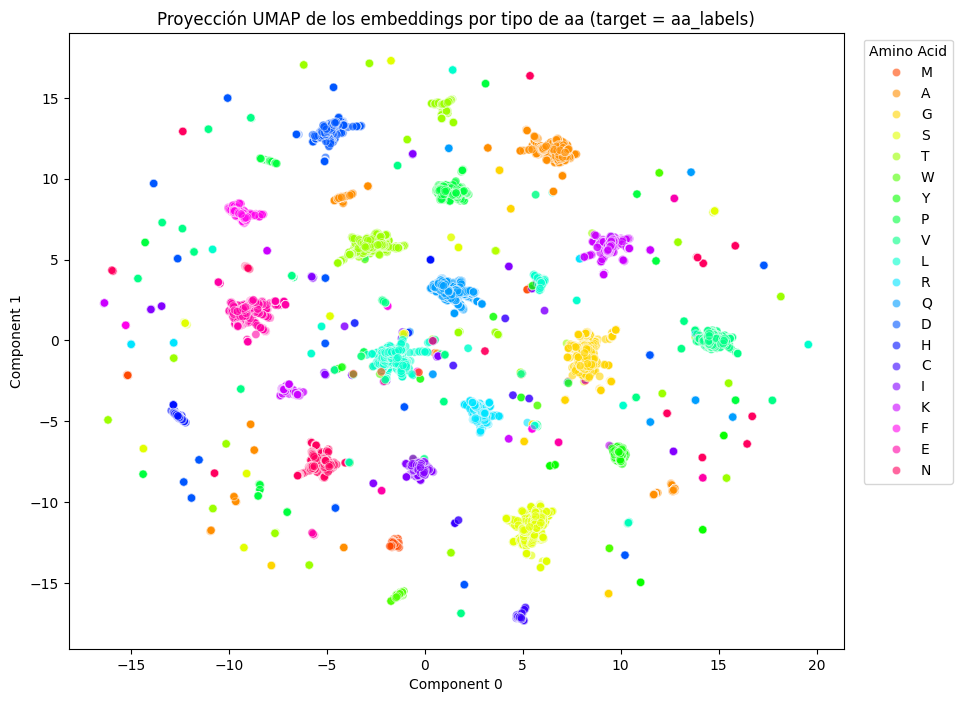

In [ ]:
# Configurar la paleta de colores
palette = sns.color_palette("hsv", len(set(amino_acid_vector)))  # 20 colores diferentes

# Graficar los embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='Amino Acid',
    palette=palette,
    data=embedding_PCA_aa,
    legend='full',
    alpha=0.6
)
plt.title('Proyección UMAP de los embeddings por tipo de aa (target = aa_labels)')
plt.legend(title='Amino Acid', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.show()

### Gráfico x región APR/No-APR


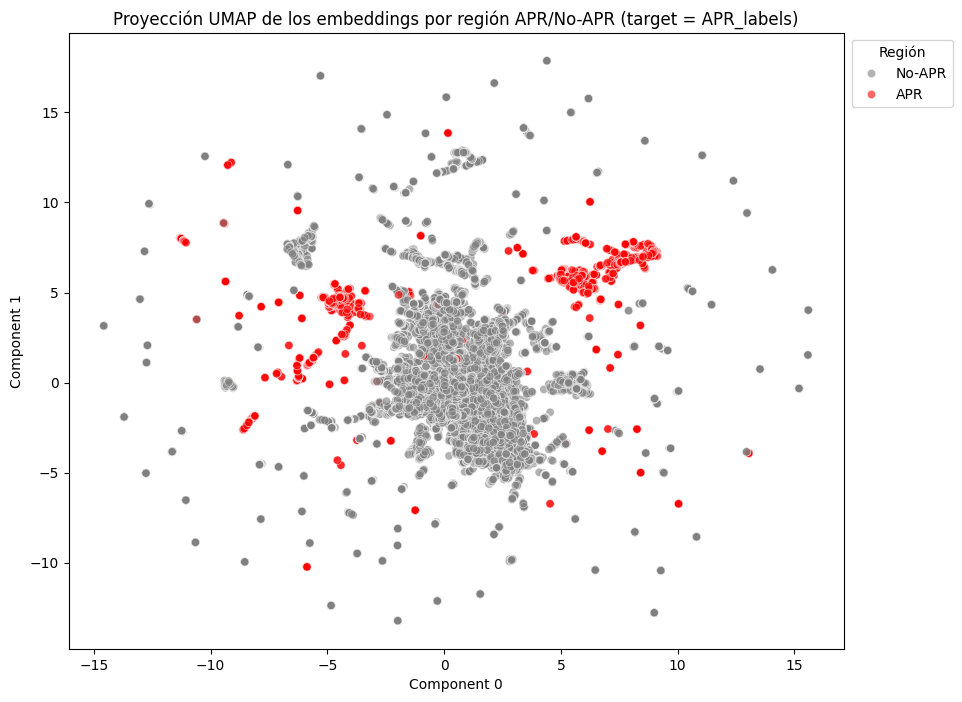

In [ ]:
# Configurar la paleta de colores para dos categorías: APR y No-APR
palette = ["gray", "red"]  # Solo 2 colores diferentes

# Graficar los embeddings
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='APR',
    palette=palette,
    data=embedding_PCA_APR,
    legend='full',
    alpha=0.6
)
plt.title('Proyección UMAP de los embeddings por región APR/No-APR (target = APR_labels)')

# Obtener la leyenda generada y cambiar los nombres
handles, labels = scatter.get_legend_handles_labels()
new_labels = ['No-APR', 'APR']
plt.legend(handles=handles[0:], labels=new_labels, title='Región', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.show()

### Gráfico x región ordeada/desordenada


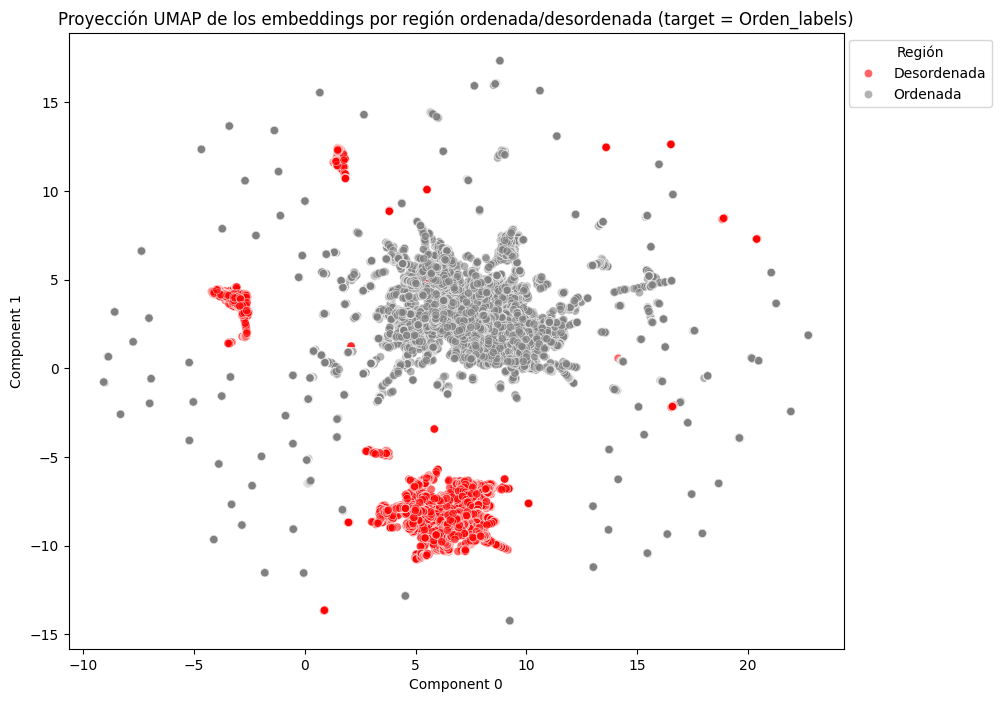

In [ ]:
# Configurar la paleta de colores para dos categorías: APR y No-APR
palette = ["red", "gray"]  # Solo 2 colores diferentes

# Graficar los embeddings
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='Desorden',
    palette=palette,
    data=embedding_PCA_desorden,
    legend='full',
    alpha=0.6
)
plt.title('Proyección UMAP de los embeddings por región ordenada/desordenada (target = Orden_labels)')

# Obtener la leyenda generada y cambiar los nombres
handles, labels = scatter.get_legend_handles_labels()
new_labels = ['Desordenada', 'Ordenada']
plt.legend(handles=handles[0:], labels=new_labels, title='Región', bbox_to_anchor=(1.20, 1), loc='upper right')
plt.show()

## Reducción de dimensiones

### Objetivo 1: identificación de embeddings por tipo de aminoacido

#### Calculo de importancias

##### Clasificador de embeddings. Target = tipo de aa

In [ ]:
# Dividir los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    embeddings_matrix, amino_acid_vector,
    test_size=0.3, random_state=42, stratify=amino_acid_vector
)

# Verificar la proporción de categorías en el conjunto de entrenamiento
unique_train, counts_train = np.unique(y_train, return_counts=True)
proportions_train = counts_train / len(y_train)
print("Proporción de categorías en el conjunto de entrenamiento:")
for category, proportion in zip(unique_train, proportions_train):
    print(f"{category}: {proportion:.2f}")

# Verificar la proporción de categorías en el conjunto de prueba
unique_test, counts_test = np.unique(y_test, return_counts=True)
proportions_test = counts_test / len(y_test)
print("\nProporción de categorías en el conjunto de prueba:")
for category, proportion in zip(unique_test, proportions_test):
    print(f"{category}: {proportion:.2f}")

Proporción de categorías en el conjunto de entrenamiento:
A: 0.08
C: 0.01
D: 0.06
E: 0.06
F: 0.03
G: 0.08
H: 0.02
I: 0.04
K: 0.05
L: 0.08
M: 0.02
N: 0.05
P: 0.06
Q: 0.05
R: 0.04
S: 0.08
T: 0.08
V: 0.07
W: 0.01
Y: 0.03

Proporción de categorías en el conjunto de prueba:
A: 0.08
C: 0.01
D: 0.06
E: 0.06
F: 0.03
G: 0.08
H: 0.02
I: 0.04
K: 0.05
L: 0.08
M: 0.02
N: 0.05
P: 0.06
Q: 0.05
R: 0.04
S: 0.08
T: 0.08
V: 0.07
W: 0.01
Y: 0.03


1 minuto

In [ ]:
# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predecir las etiquetas de clase en los datos de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.999244827065398

Informe de clasificación:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       553
           C       1.00      0.99      0.99        88
           D       1.00      1.00      1.00       375
           E       1.00      1.00      1.00       422
           F       1.00      1.00      1.00       202
           G       1.00      1.00      1.00       505
           H       1.00      1.00      1.00       123
           I       1.00      1.00      1.00       250
           K       1.00      1.00      1.00       333
           L       1.00      1.00      1.00       531
           M       1.00      1.00      1.00       112
           N       1.00      1.00      1.00       351
           P       1.00      1.00      1.00       387
           Q       1.00      1.00      1.00       323
           R       1.00      1.00      1.00       282
           S       1.00      1.00      1.00       524
           T  

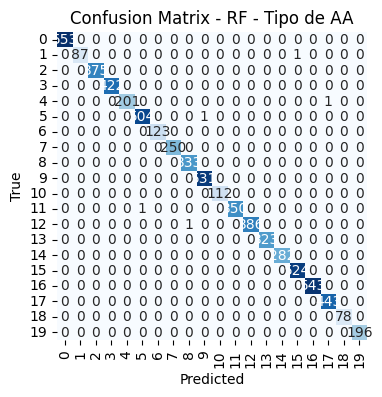

In [ ]:
# Calcular y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - RF - Tipo de AA')
plt.show()

##### Importancia acumulada y definición de los primeros "n" features más importantes

In [ ]:
# Extraer la importancia de las características
feature_importances = rf_model.feature_importances_

In [ ]:
# Obtener los índices de las características ordenadas por importancia
sorted_indices = np.argsort(feature_importances)[::-1]

# Ordenar las importancias de las características
sorted_importances = feature_importances[sorted_indices]

# Crear un rango de características
features_range = np.arange(len(feature_importances))

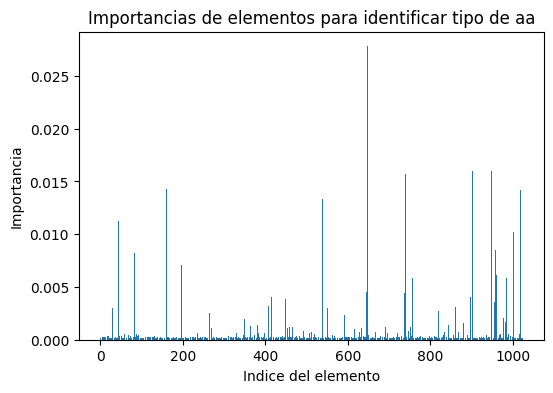

In [ ]:
# Graficar las importancias de las características
plt.figure(figsize=(6, 4))
plt.bar(features_range, feature_importances, align='center')
plt.xlabel('Indice del elemento')
plt.ylabel('Importancia')
plt.title('Importancias de elementos para identificar tipo de aa')
plt.show()

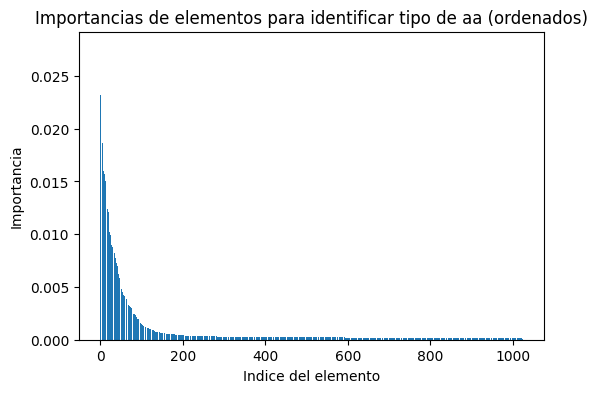

In [ ]:
# Graficar las importancias de las características
plt.figure(figsize=(6, 4))
plt.bar(features_range, sorted_importances, align='center')  # Ajusta el ancho de las barras
plt.xlabel('Indice del elemento')
plt.ylabel('Importancia')
plt.title('Importancias de elementos para identificar tipo de aa (ordenados)')

plt.show()

In [ ]:
# Calcular la importancia acumulada de las características
cumulative_importance = np.cumsum(sorted_importances)

# Encontrar el número de características necesarias para alcanzar el 80% de la importancia total
n_features_for_80_percent = np.argmax(cumulative_importance >= 0.80 * np.sum(sorted_importances)) + 1

print(f"Número de características necesarias para alcanzar el 80% de la importancia total: {n_features_for_80_percent}")

Número de características necesarias para alcanzar el 80% de la importancia total: 163


#### UMAP y gráfico (tipo de aa)

Tarda 2 minutos

In [ ]:
# Selección de las dimensiones importantes. Elegimos 163 en base a la importancia acumulada
important_indices = np.argsort(feature_importances)[-163:]
important_elements_embeddings = embeddings_matrix[:, important_indices]

# Reducción de dimensionalidad usando UMAP
embedding_important_aa = reducer.fit_transform(important_elements_embeddings, aa_numeric)

# Crear un DataFrame para facilitar la visualización
embedding_df_important_aa = pd.DataFrame(embedding_important_aa, columns=['Component 0', 'Component 1'])
embedding_df_important_aa['Amino Acid'] = amino_acid_vector

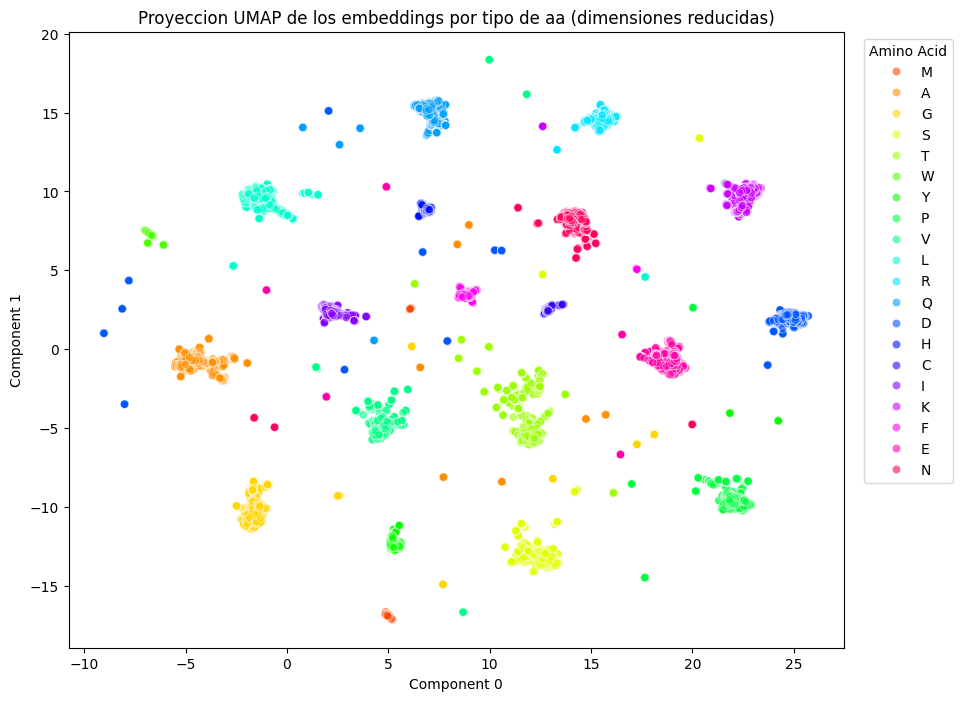

In [ ]:
# Configurar la paleta de colores
palette = sns.color_palette("hsv", len(set(amino_acid_vector)))

# Graficar los embeddings importantes
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='Amino Acid',
    palette=palette,
    data=embedding_df_important_aa,
    legend='full',
    alpha=0.6
)
plt.title('Proyeccion UMAP de los embeddings por tipo de aa (dimensiones reducidas)')
plt.legend(title='Amino Acid', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.show()

### Comparación de gráficos sin y con reducción de dimensionalidad

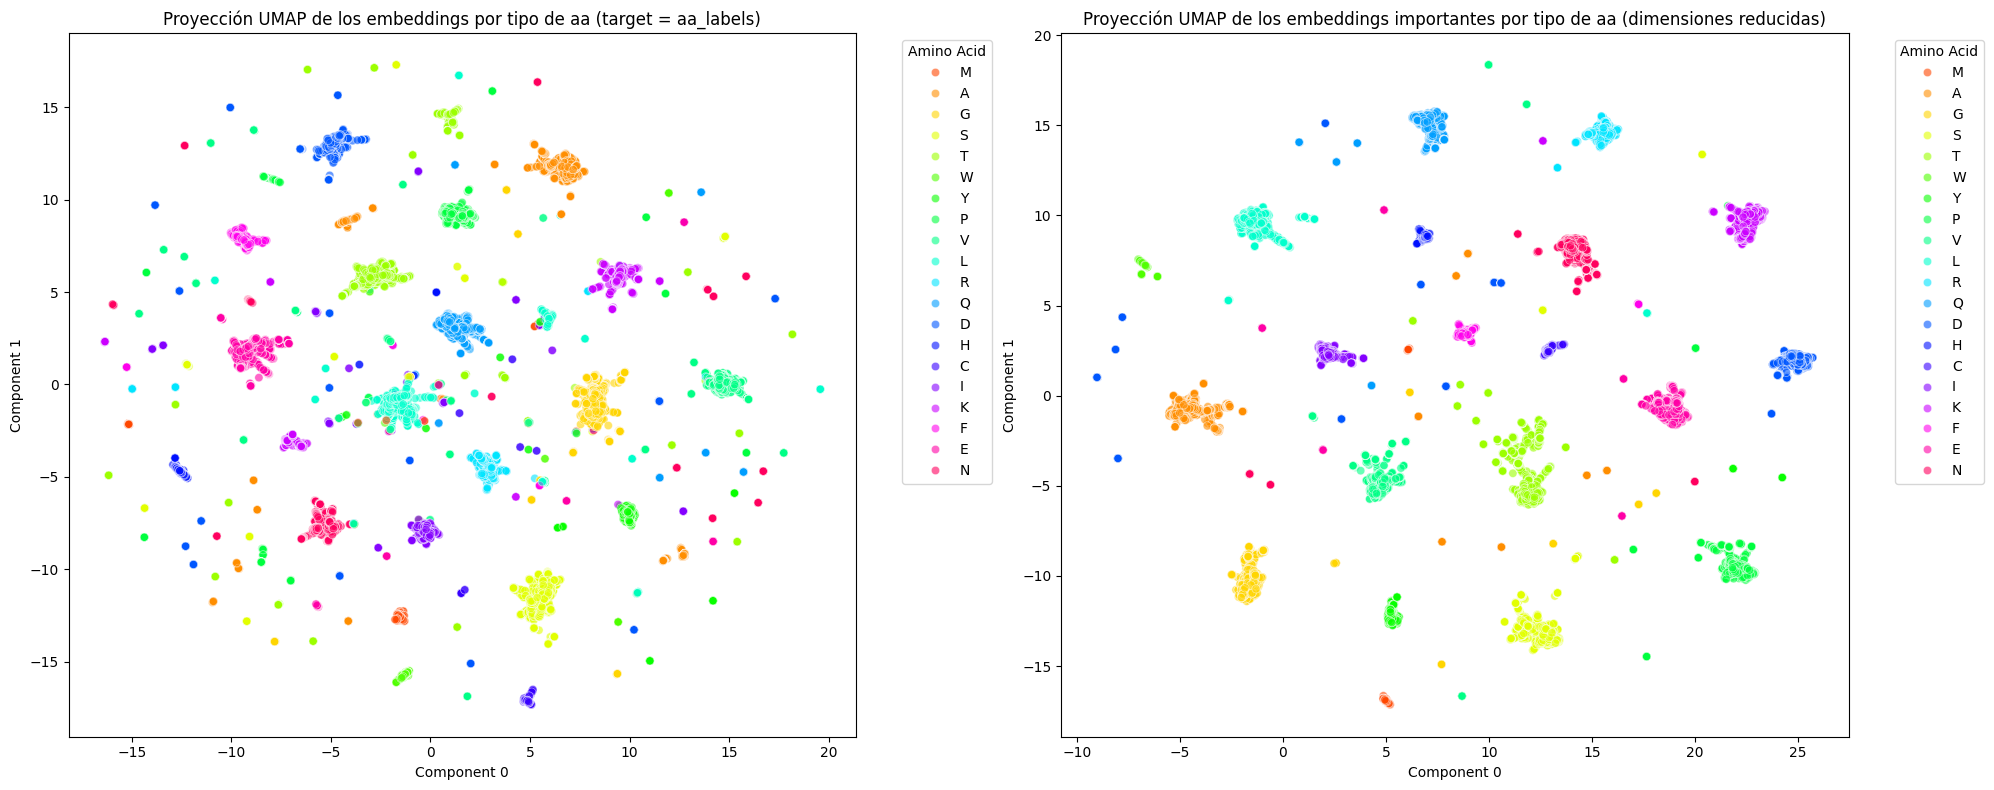

In [ ]:
# Crear una figura y dos subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Primer subplot: Graficar los embeddings
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='Amino Acid',
    palette=palette,
    data=embedding_PCA_aa,
    legend='full',
    alpha=0.6,
    ax=axs[0]  # Seleccionar el segundo subplot
)
axs[0].set_title('Proyección UMAP de los embeddings por tipo de aa (target = aa_labels)')
axs[0].legend(title='Amino Acid', bbox_to_anchor=(1.05, 1), loc='upper left')

# Segundo subplot: Graficar los embeddings importantes
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='Amino Acid',
    palette=palette,
    data=embedding_df_important_aa,
    legend='full',
    alpha=0.6,
    ax=axs[1]  # Seleccionar el primer subplot
)
axs[1].set_title('Proyección UMAP de los embeddings importantes por tipo de aa (dimensiones reducidas)')
axs[1].legend(title='Amino Acid', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()

### APR/No-APR con UMAP target == aa

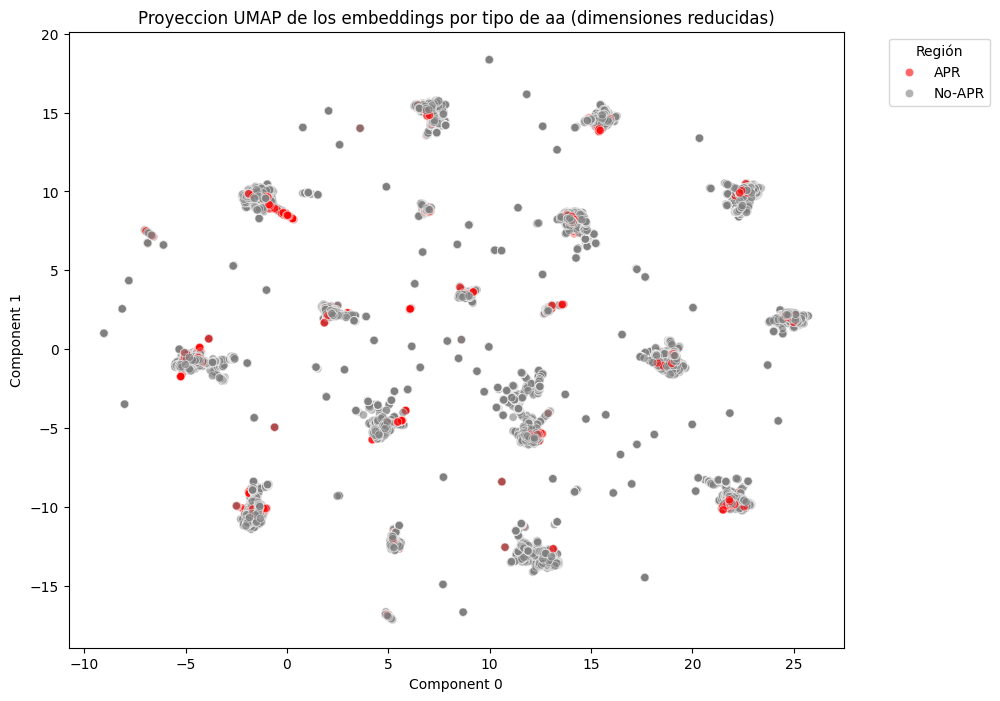

In [ ]:
pallette2 = ["gray", "red"]
embedding_df_important_aa["APR"] = APR_labels
new_labels = ['APR', 'No-APR']


# Graficar los embeddings importantes
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='APR',
    palette=pallette2,
    data=embedding_df_important_aa,
    legend='full',
    alpha=0.6
)
plt.title('Proyeccion UMAP de los embeddings por tipo de aa (dimensiones reducidas)')
plt.legend(handles=handles[0:], labels=new_labels, title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Contar el total de 1s en la columna APR_labels
total_ones_apr = embedding_PCA_aa['APR'].sum()

# Mostrar el resultado
print(f"Total de 1s en APR_labels: {total_ones_apr}")

Total de 1s en APR_labels: 1893.0


### Objetivo 2: identificación de embedding por tipo de región (APR/No-APR)

#### Calculo de importancias

##### Clasificador de embeddings. Target = tipo de región

In [ ]:
# Definimos la proporción para la división de datos
train_val_ratio = 0.85  # 85% para entrenamiento y validación, 15% para test
test_ratio = 0.15

# Dividir los datos en entrenamiento/validación y test
X_train_val, X_test, y_train_val, y_test = train_test_split(embeddings_matrix, APR_labels, test_size=test_ratio, random_state=42, stratify=APR_labels)

# Verificar la proporción de categorías en el conjunto de entrenamiento
unique_train, counts_train = np.unique(y_train_val, return_counts=True)
proportions_train = counts_train / len(y_train_val)
print("Proporción de categorías en el conjunto de entrenamiento:")
for category, proportion in zip(unique_train, proportions_train):
    print(f"{category}: {proportion:.2f}")

# Verificar la proporción de categorías en el conjunto de prueba
unique_test, counts_test = np.unique(y_test, return_counts=True)
proportions_test = counts_test / len(y_test)
print("\nProporción de categorías en el conjunto de prueba:")
for category, proportion in zip(unique_test, proportions_test):
    print(f"{category}: {proportion:.2f}")

Proporción de categorías en el conjunto de entrenamiento:
0.0: 0.91
1.0: 0.09

Proporción de categorías en el conjunto de prueba:
0.0: 0.91
1.0: 0.09


Tarda 15 minutos

In [ ]:
# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

i = 1

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)
cv_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

for train_index, val_index in kf.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_index], X_train_val[val_index]
    y_train, y_val = y_train_val[train_index], y_train_val[val_index]

    # Entrenar el modelo
    rf_classifier.fit(X_train, y_train)

    # Predecir en el conjunto de validación
    y_val_pred = rf_classifier.predict(X_val)
    # Calcular métricas de rendimiento
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred)

    # Almacenar resultados
    cv_results['accuracy'].append(accuracy)
    cv_results['precision'].append(precision)
    cv_results['recall'].append(recall)
    cv_results['f1'].append(f1)
    cv_results['roc_auc'].append(roc_auc)

    print(f"Combinación {i} realizada")
    i+=1
    if(i==6):
      print("Fin!")

# Entrenar el modelo final en todo el conjunto de entrenamiento/validación
rf_classifier.fit(X_train_val, y_train_val)

# Predecir en el conjunto de prueba
y_test_pred = rf_classifier.predict(X_test)

# Calcular métricas de rendimiento en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

Combinación 1 realizada
Combinación 2 realizada
Combinación 3 realizada
Combinación 4 realizada
Combinación 5 realizada
Fin!


Cross validation

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

$$
\text{ROC AUC} = \text{Área bajo la curva ROC (TPR vs. FPR)}
$$


In [ ]:
# Imprimir resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print("Accuracy:", np.mean(cv_results['accuracy']))
print("Precisión:", np.mean(cv_results['precision']))
print("Recall:", np.mean(cv_results['recall']))
print("F1-score:", np.mean(cv_results['f1']))
print("ROC AUC score:", np.mean(cv_results['roc_auc']))

Resultados de la validación cruzada:
Accuracy: 0.9226955398958288
Precisión: 0.9463736263736264
Recall: 0.10503473230007158
F1-score: 0.1889803381545486
ROC AUC score: 0.5522257699465


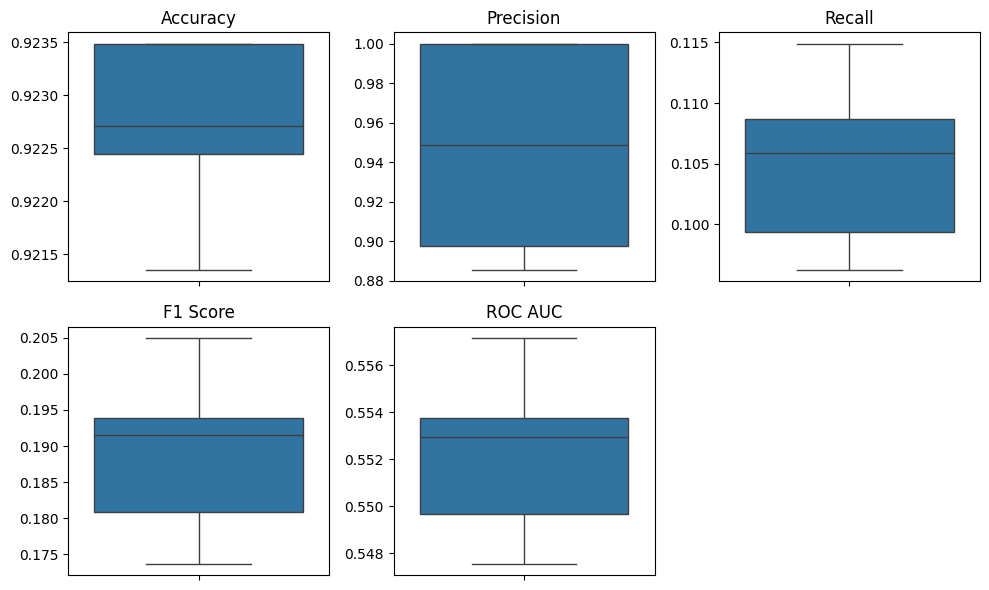

In [ ]:
# Plotting cross-validation results
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
sns.boxplot(data=cv_results['accuracy'])
plt.title('Accuracy')

plt.subplot(2, 3, 2)
sns.boxplot(data=cv_results['precision'])
plt.title('Precision')

plt.subplot(2, 3, 3)
sns.boxplot(data=cv_results['recall'])
plt.title('Recall')

plt.subplot(2, 3, 4)
sns.boxplot(data=cv_results['f1'])
plt.title('F1 Score')

plt.subplot(2, 3, 5)
sns.boxplot(data=cv_results['roc_auc'])
plt.title('ROC AUC')

plt.tight_layout()
plt.show()

Resultados del algoritmo

In [ ]:
print("\nMétricas de rendimiento en el conjunto de prueba (RF):")
print("Accuracy:", test_accuracy)
print("Precisión:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("ROC AUC score:", test_roc_auc)


Métricas de rendimiento en el conjunto de prueba (RF):
Accuracy: 0.9238900634249472
Precisión: 0.9
Recall: 0.1267605633802817
F1-score: 0.22222222222222224
ROC AUC score: 0.5627195615051392



​


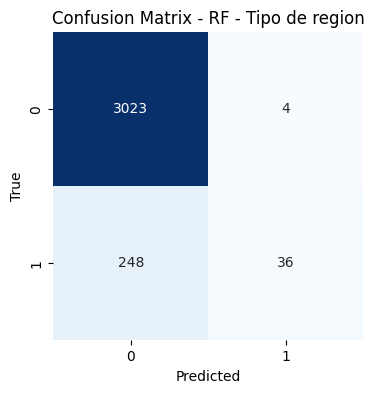

In [ ]:
# Calcular y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - RF - Tipo de region')
plt.show()

##### Importancia acumulada y definición de los primeros "n" features más importantes

In [ ]:
# Extraer la importancia de las características
feature_importances = rf_classifier.feature_importances_

In [ ]:
# Obtener los índices de las características ordenadas por importancia
sorted_indices = np.argsort(feature_importances)[::-1]

# Ordenar las importancias de las características
sorted_importances = feature_importances[sorted_indices]

# Crear un rango de características
features_range = np.arange(len(feature_importances))

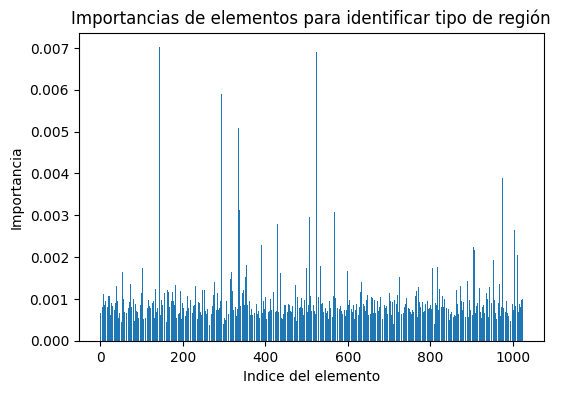

In [ ]:
# Graficar las importancias de las características
plt.figure(figsize=(6, 4))
plt.bar(features_range, feature_importances, align='center')
plt.xlabel('Indice del elemento')
plt.ylabel('Importancia')
plt.title('Importancias de elementos para identificar tipo de región')
plt.show()

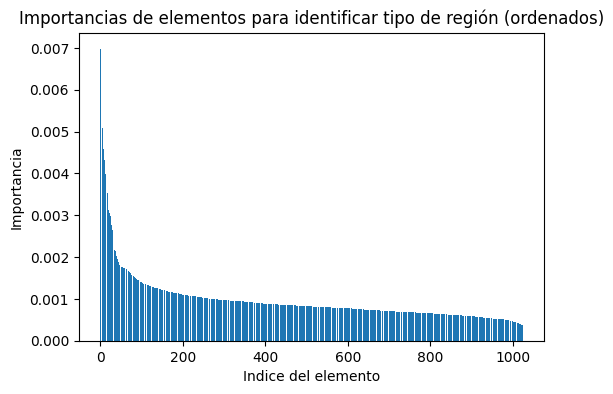

In [ ]:
# Graficar las importancias de las características
plt.figure(figsize=(6, 4))
plt.bar(features_range, sorted_importances, align='center')  # Ajusta el ancho de las barras
plt.xlabel('Indice del elemento')
plt.ylabel('Importancia')
plt.title('Importancias de elementos para identificar tipo de región (ordenados)')

plt.show()

In [ ]:
# Calcular la importancia acumulada de las características
cumulative_importance = np.cumsum(sorted_importances)

# Encontrar el número de características necesarias para alcanzar el 80% de la importancia total
n_features_for_80_percent = np.argmax(cumulative_importance >= 0.80 * np.sum(sorted_importances)) + 1

print(f"Número de características necesarias para alcanzar el 80% de la importancia total: {n_features_for_80_percent}")

Número de características necesarias para alcanzar el 80% de la importancia total: 692


#### PCA con UMAP y gráfico (tipo de región)

In [ ]:
# Selección de las dimensiones importantes. Elegimos 692 en base a la importancia acumulada
important_indices = np.argsort(feature_importances)[-692:]
important_elements_embeddings = embeddings_matrix[:, important_indices]

# Reducción de dimensionalidad usando UMAP
random_state = 42

reducer = umap.UMAP(random_state = random_state)
embedding_important_APR = reducer.fit_transform(important_elements_embeddings, APR_labels)

# Crear un DataFrame para facilitar la visualización
embedding_df_important_APR = pd.DataFrame(embedding_important_APR, columns=['Component 0', 'Component 1'])
embedding_df_important_APR['APR'] = APR_labels

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
pallette2 = ["gray", "red"]
embedding_df_important_APR["APR"] = APR_labels
new_labels = ['APR', 'No-APR']

# Graficar los embeddings importantes
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='APR',
    palette=pallette2,
    data=embedding_df_important_APR,
    legend='full',
    alpha=0.6
)

plt.title('Proyeccion UMAP de los embeddings por región APR/No-APR (dimensiones reducidas)')
plt.legend(handles=handles[0:], labels=new_labels, title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Comparación de gráficos sin y con reducción de dimensionalidad

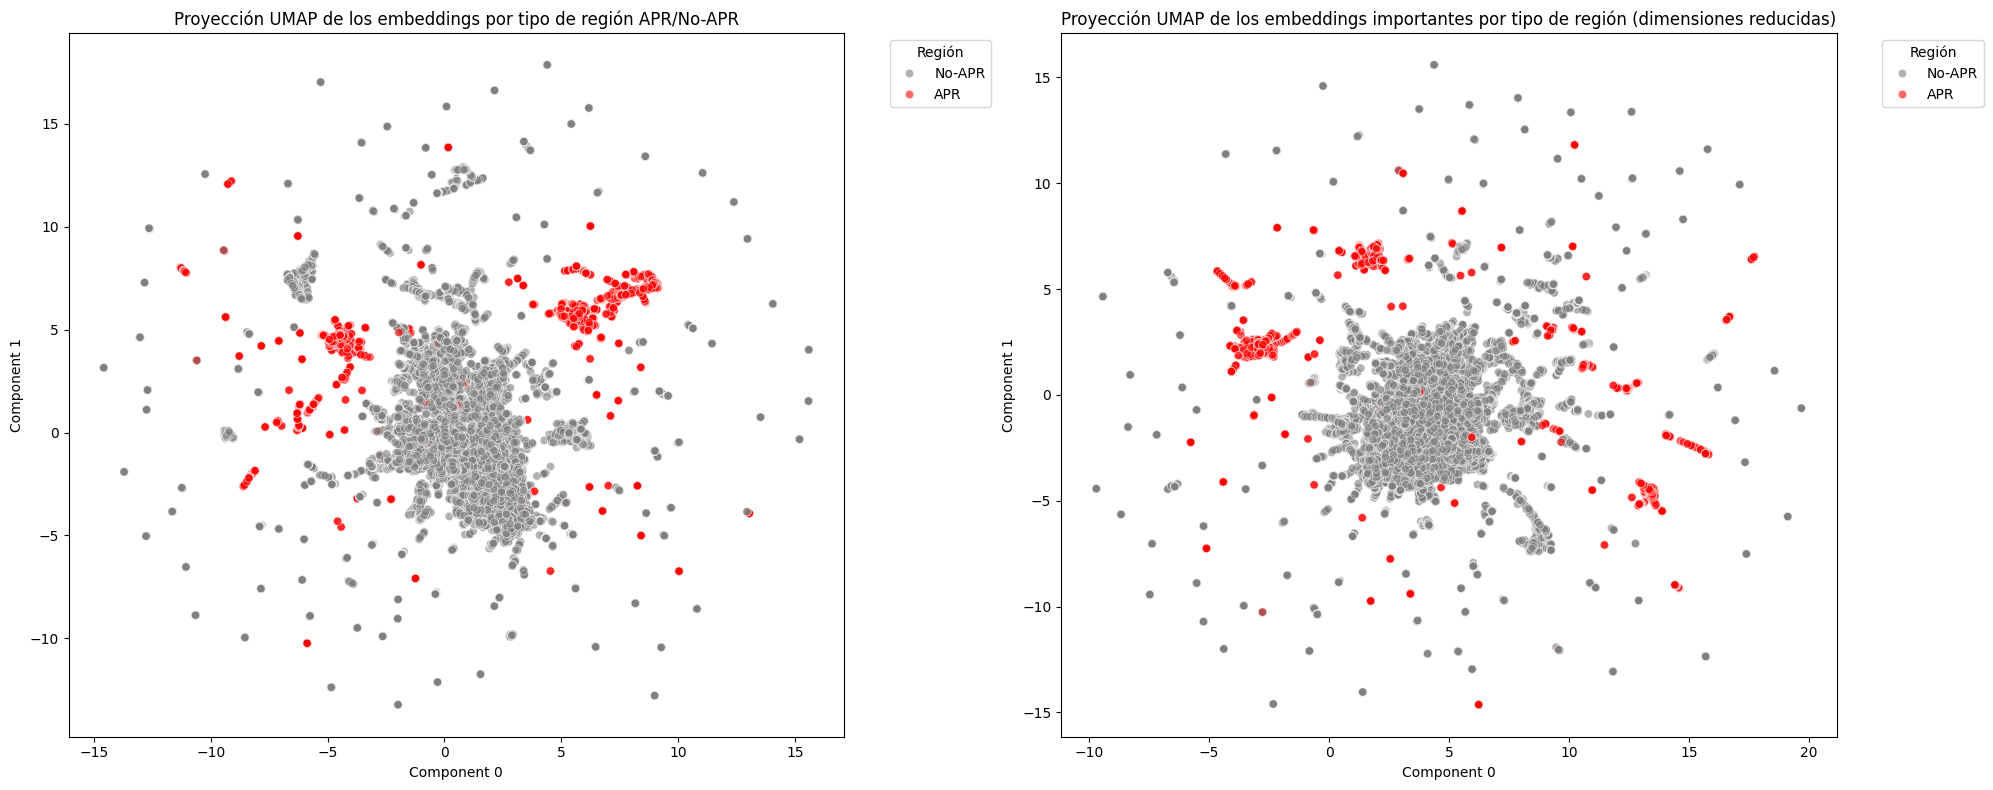

In [ ]:
# Crear una figura y dos subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

new_labels = ['No-APR', 'APR']

# Graficar los embeddings en el primer subplot
scatter = sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='APR',
    palette=pallette2,
    data=embedding_PCA_APR,
    legend='full',
    alpha=0.6,
    ax=axs[0]  # Seleccionar el primer subplot
)
axs[0].set_title('Proyección UMAP de los embeddings por tipo de región APR/No-APR')

# Obtener la leyenda generada y cambiar los nombres en el primer subplot
handles, labels = scatter.get_legend_handles_labels()
axs[0].legend(handles=handles[0:], labels=new_labels, title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Graficar los embeddings importantes en el segundo subplot
sns.scatterplot(
    x='Component 0', y='Component 1',
    hue='APR',
    palette=pallette2,
    data=embedding_df_important_APR,
    legend='full',
    alpha=0.6,
    ax=axs[1]  # Seleccionar el segundo subplot
)
axs[1].set_title('Proyección UMAP de los embeddings importantes por tipo de región (dimensiones reducidas)')
handles, labels = scatter.get_legend_handles_labels()
axs[1].legend(handles=handles[0:], labels=new_labels, title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrar la figura
plt.tight_layout()
plt.show()